# **Data Extraction**

In [17]:
import requests
from bs4 import BeautifulSoup
import csv
import time
import os

base_url = "http://books.toscrape.com/"
output_filename = "books_data.csv"
delay = 1

def get_book_urls():
    book_urls = []
    page_url = base_url + "catalogue/page-1.html"

    while True:
        time.sleep(delay)
        print(f"Scraping page: {page_url}")
        try:
            response = requests.get(page_url)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, "html.parser")

            for h3 in soup.find_all("h3"):
                book_path = h3.find("a")["href"]
                if book_path.startswith("../../../"):
                    book_url = base_url + "catalogue/" + book_path[9:]
                elif book_path.startswith("../../"):
                    book_url = base_url + "catalogue/" + book_path[6:]
                elif book_path.startswith("../"):
                    book_url = base_url + "catalogue/" + book_path[3:]
                else:
                    book_url = base_url + "catalogue/" + book_path
                book_urls.append(book_url)

            next_button = soup.find("li", class_="next")
            if not next_button:
                break
            next_page = next_button.find("a")["href"]
            page_url = base_url + "catalogue/" + next_page
        except Exception as e:
            print(f"Error processing page {page_url}: {e}")
            break

    return book_urls

def scrape_book(url):
    time.sleep(delay)
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        title = soup.find("h1").text
        price = soup.find("p", class_="price_color").text
        availability = soup.find("p", class_="instock").text.strip()

        info = {}
        table = soup.find("table", class_="table-striped")
        if table:
            for row in table.find_all("tr"):
                key = row.find("th").text
                value = row.find("td").text
                info[key] = value

        return {
            "Title": title,
            "Price": price,
            "Availability": availability,
            "UPC": info.get("UPC", ""),
            "Product Type": info.get("Product Type", ""),
            "URL": url
        }
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return None
def main():
    print("Starting scrape...")
    book_urls = get_book_urls()
    print(f"Found {len(book_urls)} books to scrape")


    script_dir = os.path.dirname(os.path.abspath(file))

    try:

        desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
        output_path = os.path.join(desktop_path, output_filename)
    except:

        output_path = os.path.join(script_dir, output_filename)

    try:
        with open(output_path, "w", newline="", encoding="utf-8") as file:
            writer = csv.DictWriter(file, fieldnames=[
                "Title", "Price", "Availability", "UPC", "Product Type", "URL"
            ])
            writer.writeheader()

            success_count = 0
            for i, url in enumerate(book_urls, 1):
                book = scrape_book(url)
                if book:
                    writer.writerow(book)
                    success_count += 1
                    print(f"Scraped {i}/{len(book_urls)}: {book['Title'][:30]}...")

        print(f"\nSuccess! Saved {success_count} books to:")
        print(output_path)
    except PermissionError:
        print("\nERROR: Permission denied. Try these solutions:")
        print(f"1. Close any programs that might be using {output_filename}")
        print(f"2. Choose a different save location by modifying 'output_path'")
        print(f"3. Run your Python script as administrator")
    except Exception as e:
        print(f"\nERROR: {e}")
        print("Trying to save in script directory instead...")
        output_path = os.path.join(script_dir, output_filename)
        with open(output_path, "w", newline="", encoding="utf-8") as file:
            writer = csv.DictWriter(file, fieldnames=[
                "Title", "Price", "Availability", "UPC", "Product Type", "URL"
            ])
            writer.writeheader()
            for book in filter(None, [scrape_book(url) for url in book_urls]):
                writer.writerow(book)
        print(f"Saved to {output_path} as fallback")

if __name__ == "__main__":
    main()

Starting scrape...
Scraping page: http://books.toscrape.com/catalogue/page-1.html
Scraping page: http://books.toscrape.com/catalogue/page-2.html
Scraping page: http://books.toscrape.com/catalogue/page-3.html
Scraping page: http://books.toscrape.com/catalogue/page-4.html
Scraping page: http://books.toscrape.com/catalogue/page-5.html
Scraping page: http://books.toscrape.com/catalogue/page-6.html
Scraping page: http://books.toscrape.com/catalogue/page-7.html
Scraping page: http://books.toscrape.com/catalogue/page-8.html
Scraping page: http://books.toscrape.com/catalogue/page-9.html
Scraping page: http://books.toscrape.com/catalogue/page-10.html
Scraping page: http://books.toscrape.com/catalogue/page-11.html
Scraping page: http://books.toscrape.com/catalogue/page-12.html
Scraping page: http://books.toscrape.com/catalogue/page-13.html
Scraping page: http://books.toscrape.com/catalogue/page-14.html
Scraping page: http://books.toscrape.com/catalogue/page-15.html
Scraping page: http://books.to

UnboundLocalError: cannot access local variable 'file' where it is not associated with a value

# **Data Cleaning, Processing, and Regular Expressions**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re # type: ignore

df = pd.read_csv('/content/books_data.csv')
print(df.info())
print(df.shape)
print(df.head())

print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

df_s = df.astype('string')

for column in df_s.columns:
    for index in df_s.index:
        match = re.match('The', df_s.loc[index, column])
        if match:
            print(f"Match found in column '{column}', index {index}: {match.group(0)}")


         # Clean and preprocess the dataset

df["Price"] = df["Price"].str.replace("Â£", "").astype(float)
df["Availability"] = df["Availability"].str.extract(r"(\d+)").astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1000 non-null   object
 1   Price         1000 non-null   object
 2   Availability  1000 non-null   object
 3   UPC           1000 non-null   object
 4   Product Type  1000 non-null   object
 5   URL           1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB
None
(1000, 6)
                                   Title    Price             Availability  \
0                   A Light in the Attic  Â£51.77  In stock (22 available)   
1                     Tipping the Velvet  Â£53.74  In stock (20 available)   
2                             Soumission  Â£50.10  In stock (20 available)   
3                          Sharp Objects  Â£47.82  In stock (20 available)   
4  Sapiens: A Brief History of Humankind  Â£54.23  In stock (20 available)   

                UPC Product Type  

# **Data Analysis**

In [18]:
# Compute basic statistics
average_price = df["Price"].mean()
min_price = df["Price"].min()
max_price = df["Price"].max()
most_common_stock = df["Availability"].mode()[0]
lowest_stock = df["Availability"].min()

# Print basic statistics
print(f"Average Price: £{average_price:.2f}")
print(f"Min Price: £{min_price:.2f}")
print(f"Max Price: £{max_price:.2f}")
print(f"Most Common Stock Level: {most_common_stock}")
print(f"Lowest Stock Level: {lowest_stock}")

# Identify trends
price_distribution = df["Price"].describe()
print("\nPrice Distribution:")
print(price_distribution)

# Correlation between Price and Availability
stock_correlation = df[["Price", "Availability"]].corr()
print("\nCorrelation between Price and Availability:")
print(stock_correlation)

# Identify patterns in book pricing and stock levels
expensive_books = df[df["Price"] > 50]
print(f"\nNumber of books priced above £50: {len(expensive_books)}")

affordable_books = df[df["Price"] < 20]
print(f"Number of books priced below £20: {len(affordable_books)}")

high_demand_books = df[df["Availability"] < 5]
print(f"Number of books with low stock (<5): {len(high_demand_books)}")

# Additional Analysis

# 1. Price Categories
price_categories = {
    'Low': df[df["Price"] < 20].shape[0],
    'Medium': df[(df["Price"] >= 20) & (df["Price"] <= 50)].shape[0],
    'High': df[df["Price"] > 50].shape[0]
}
print("\nPrice Categories Count:")
for category, count in price_categories.items():
    print(f"{category} Price Books: {count}")

# 2. Availability Statistics
average_availability = df["Availability"].mean()
max_availability = df["Availability"].max()
min_availability = df["Availability"].min()

print(f"\nAverage Availability: {average_availability:.2f}")
print(f"Max Availability: {max_availability}")
print(f"Min Availability: {min_availability}")

# 3. Price vs. Availability Analysis
# Calculate the average price for books with low, medium, and high availability
availability_bins = pd.cut(df["Availability"], bins=[0, 5, 15, 100], labels=["Low", "Medium", "High"])
price_by_availability = df.groupby(availability_bins)["Price"].mean()

print("\nAverage Price by Availability Level:")
print(price_by_availability)

# 4. Identify Outliers in Price
q1 = df["Price"].quantile(0.25)
q3 = df["Price"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]
print(f"\nNumber of Outlier Books in Price: {len(outliers)}")

# 5. Summary of Findings
print("\nSummary of Findings:")
print(f"- Total number of books: {df.shape[0]}")
print(f"- Average price of books: £{average_price:.2f}")
print(f"- Average availability of books: {average_availability:.2f}")
print(f"- Number of books priced above £50: {len(expensive_books)}")
print(f"- Number of books priced below £20: {len(affordable_books)}")
print(f"- Number of books with low stock (<5): {len(high_demand_books)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1000 non-null   object
 1   Price         1000 non-null   object
 2   Availability  1000 non-null   object
 3   UPC           1000 non-null   object
 4   Product Type  1000 non-null   object
 5   URL           1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB
None
(1000, 6)
                                   Title    Price             Availability  \
0                   A Light in the Attic  Â£51.77  In stock (22 available)   
1                     Tipping the Velvet  Â£53.74  In stock (20 available)   
2                             Soumission  Â£50.10  In stock (20 available)   
3                          Sharp Objects  Â£47.82  In stock (20 available)   
4  Sapiens: A Brief History of Humankind  Â£54.23  In stock (20 available)   

                UPC Product Type  

<ipython-input-18-17b929c699ed>:92: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_availability = df.groupby(availability_bins)["Price"].mean()


# **Data Visualization**

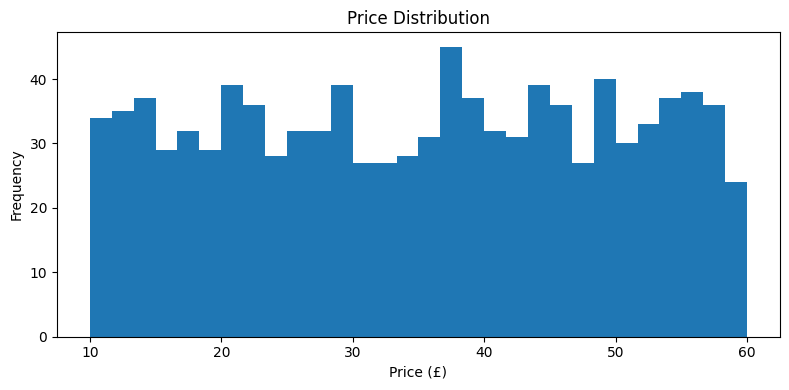

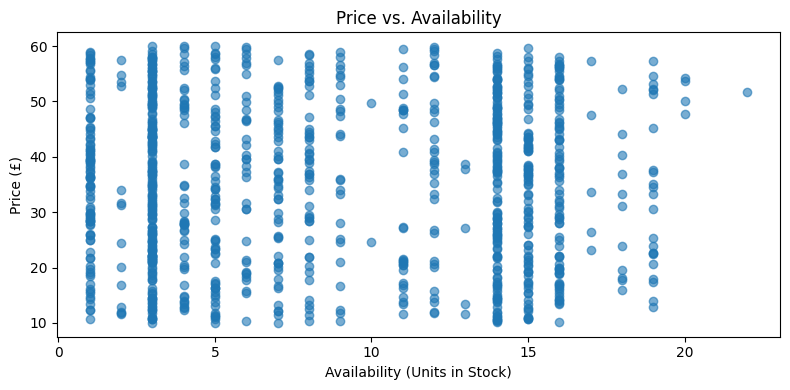

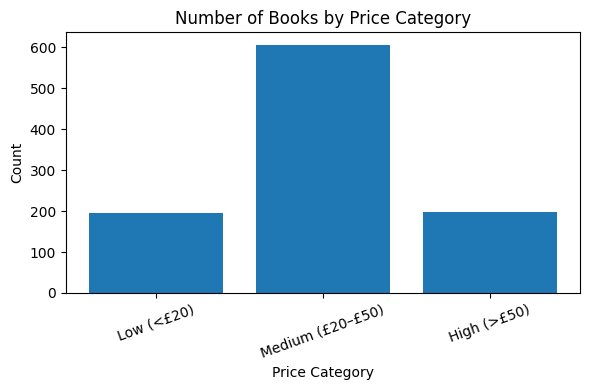

<Figure size 800x400 with 0 Axes>

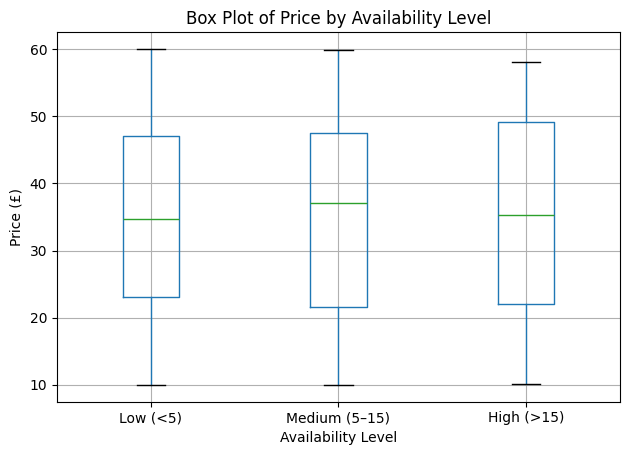

In [ ]:
import matplotlib.pyplot as plt


# Assuming 'df' is your DataFrame

# Convert 'Price' and 'Availability' to strings only if they are not already
if not pd.api.types.is_string_dtype(df["Price"]):
    df["Price"] = df["Price"].astype(str)
if not pd.api.types.is_string_dtype(df["Availability"]):
    df["Availability"] = df["Availability"].astype(str)

# إزالة رمز العملة وتحويل السعر إلى float
df["Price"] = df["Price"].str.replace("Â£", "").astype(float)
# استخراج الأعداد من عمود التوفر وتحويلها إلى int
df["Availability"] = df["Availability"].str.extract(r"(\d+)").astype(int)

# 2. إعداد فئات السعر
price_bins = [0, 20, 50, df["Price"].max()]
price_labels = ["Low (<£20)", "Medium (£20–£50)", "High (>£50)"]
df["PriceCategory"] = pd.cut(df["Price"], bins=price_bins, labels=price_labels)

# 3. رسم التوزيع التكراري للأسعار
plt.figure(figsize=(8, 4))
plt.hist(df["Price"], bins=30)
plt.title("Price Distribution")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4. رسم مبعثر لـ Price vs Availability
plt.figure(figsize=(8, 4))
plt.scatter(df["Availability"], df["Price"], alpha=0.6)
plt.title("Price vs. Availability")
plt.xlabel("Availability (Units in Stock)")
plt.ylabel("Price (£)")
plt.tight_layout()
plt.show()

# 5. مخطط أعمدة لعدد الكتب حسب فئة السعر
counts = df["PriceCategory"].value_counts().reindex(price_labels)
plt.figure(figsize=(6, 4))
plt.bar(counts.index, counts.values)
plt.title("Number of Books by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# 6. مخطط صندوقي للأسعار بحسب مستوى التوفر
availability_bins = [0, 5, 15, df["Availability"].max()]
availability_labels = ["Low (<5)", "Medium (5–15)", "High (>15)"]
df["AvailCategory"] = pd.cut(df["Availability"], bins=availability_bins, labels=availability_labels)

plt.figure(figsize=(8, 4))
df.boxplot(column="Price", by="AvailCategory")
plt.title("Box Plot of Price by Availability Level")
plt.suptitle("")  # إزالة العنوان الافتراضي
plt.xlabel("Availability Level")
plt.ylabel("Price (£)")
plt.tight_layout()
plt.show()


# **Data Storage**

In [14]:
import sqlite3
import pandas as pd

# 1. Assume `df` is your final, cleaned DataFrame
#    e.g., df = pd.read_csv('books_data_clean.csv')

# 2. Create (or open) a SQLite database file
conn = sqlite3.connect('books.db')

# 3. Write the DataFrame to a table named 'books'
#    if_exists='replace' will overwrite any existing table of the same name
df.to_sql('books', conn, if_exists='replace', index=False)

# 4. (Optional) Verify by querying back a few rows
print(pd.read_sql_query('SELECT * FROM books LIMIT 5;', conn))

# 5. Close the connection when done
conn.close()


                                   Title  Price  Availability  \
0                   A Light in the Attic  51.77            22   
1                     Tipping the Velvet  53.74            20   
2                             Soumission  50.10            20   
3                          Sharp Objects  47.82            20   
4  Sapiens: A Brief History of Humankind  54.23            20   

                UPC Product Type  \
0  a897fe39b1053632        Books   
1  90fa61229261140a        Books   
2  6957f44c3847a760        Books   
3  e00eb4fd7b871a48        Books   
4  4165285e1663650f        Books   

                                                 URL  
0  http://books.toscrape.com/catalogue/a-light-in...  
1  http://books.toscrape.com/catalogue/tipping-th...  
2  http://books.toscrape.com/catalogue/soumission...  
3  http://books.toscrape.com/catalogue/sharp-obje...  
4  http://books.toscrape.com/catalogue/sapiens-a-...  
